# **IMPORTACIÓN DE LIBRERIAS**

In [2]:
#!apt install ncbi-blast+
import numpy as np                                                              # "numpy" is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more
import random                                                                   # "random" This module implements pseudo-random number generators for various distributions
import matplotlib.pyplot as plt                                                 # "pyplot" is a collection of functions that make matplotlib work like MATLAB
from matplotlib.lines import Line2D
import tensorflow as tf                                                         # "tensorflow" TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications
                                                                                # "keras" Keras is a deep learning API (application programming interface) written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result as fast as possible is key to doing good research.
import json
from tensorflow.keras import backend as K                                       # "backend" is a container of functions -----------¿De qué trata?
from tensorflow.keras.optimizers import RMSprop, Adam, Adagrad, SGD, Adadelta, Adamax, Nadam
from tensorflow.keras.layers import Dropout, Activation, Flatten, Concatenate, Dense, Reshape, Add, PReLU, LeakyReLU, BatchNormalization
from tensorflow.keras.regularizers import l2, l1, l1_l2
from time import time                                                           # "time.time" Return the time in seconds since the epoch as a floating point number. On Windows and most Unix systems, the epoch is January 1, 1970, 00:00:00 (UTC).
from numpy import argmax                                                        # "argmax" Returns the indices of the maximum values along an axis.
from sklearn.model_selection  import train_test_split                           # "sklearn" features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.
                                                                                # "train_test_split" splits arrays or matrices into random train and test subsets
#!pip install Bio
from Bio import SeqIO
import gc

#from google.colab import drive
#drive.mount('/content/drive')
#%cd /content/drive/MyDrive/Bioinformatica/YOLO y detector de dominios LTR


#!pip install ipython-autotime
#%load_ext autotime
random.seed(10)

# **DATASET WITH REAL TEs**

## PRELIMINAR ANALYSIS OF DOMAINS

In [11]:
"""
Se cargan los fastas donde están los elementos transponibles y los dominios de
estos elementos transponibles
"""
rec_TE = list(SeqIO.parse("data/TEDB.fasta","fasta"))
rec_non = list(SeqIO.parse("data/negative.fasta","fasta"))

In [12]:
dicc_analysis = {'TE':[],'PROT':[],'RT':[],'INT':[],'RH':[],'GAG':[],'LTR':[],'internal':[]}
for i in rec_TE:
  dicc_tmp_dom = json.loads(i.description.split("#")[-1].replace('\'','\"'))
  dicc_tmp_te = json.loads(i.description.split("#")[-2].replace('\'','\"'))
  dicc_analysis['TE'].append(dicc_tmp_te['TE'][1]-dicc_tmp_te['TE'][0]+1)
  internal_list = []
  for key, value in dicc_tmp_dom.items():
    if key != 'LTR':
      internal_list+=value
    if len(value)==2:
      dicc_analysis[key].append(value[-1]-value[0]+1)
    else:
      dicc_analysis[key].append(value[1]-value[0]+1)
      dicc_analysis[key].append(value[3]-value[2]+1)
  try:
    dicc_tmp_dom['LTR']
  except:
    print(f'{i.description}')
        
  start_internal = min(internal_list)
  end_internal = max(internal_list)
  dicc_analysis['internal'].append(end_internal-start_internal+1)

print(f"La cantidad total de RT es de {len(dicc_analysis['RT'])}")
print(f"La cantidad total de GAG es de {len(dicc_analysis['GAG'])}")
print(f"La cantidad total de INT es de {len(dicc_analysis['INT'])}")
print(f"La cantidad total de PROT es de {len(dicc_analysis['PROT'])}")
print(f"La cantidad total de RH es de {len(dicc_analysis['RH'])}")
print(f"La cantidad total de LTR es de {len(dicc_analysis['LTR'])}")

print(f"El tamaño máximo del RT es {max(dicc_analysis['RT'])}")
print(f"El tamaño máximo del GAG es {max(dicc_analysis['GAG'])}")
print(f"El tamaño máximo del INT es {max(dicc_analysis['INT'])}")
print(f"El tamaño máximo del PROT es {max(dicc_analysis['PROT'])}")
print(f"El tamaño máximo del RH es {max(dicc_analysis['RH'])}")
print(f"El tamaño máximo del LTR es {max(dicc_analysis['LTR'])}")

print(f"El tamaño mínimo del RT es {min(dicc_analysis['RT'])}")
print(f"El tamaño mínimo del GAG es {min(dicc_analysis['GAG'])}")
print(f"El tamaño mínimo del INT es {min(dicc_analysis['INT'])}")
print(f"El tamaño mínimo del PROT es {min(dicc_analysis['PROT'])}")
print(f"El tamaño mínimo del RH es {min(dicc_analysis['RH'])}")
print(f"El tamaño mínimo del LTR es {min(dicc_analysis['LTR'])}")

print(f"El tamaño máximo del internal es {max(dicc_analysis['internal'])}")
print(f"El tamaño mínimo del internal es {min(dicc_analysis['internal'])}")

print(f"El tamaño máximo del TE es {max(dicc_analysis['TE'])}")
print(f"El tamaño mínimo del TE es {min(dicc_analysis['TE'])}")
print(f"La cantidad total de TE es de {len(rec_TE)}")

Gnetum_montanum#scaffold1039185#gypsy#{'TE': [298332, 303330]}#{'GAG': [298332, 298691], 'PROT': [299968, 300201], 'RT': [300943, 301464], 'RH': [301642, 302088], 'INT': [302389, 303330]}
Gnetum_montanum#scaffold626265#gypsy#{'TE': [668450, 673497]}#{'GAG': [668450, 668803], 'PROT': [670118, 670351], 'RT': [671089, 671610], 'RH': [671806, 672255], 'INT': [672556, 673497]}
Gnetum_montanum#scaffold758371#gypsy#{'TE': [317066, 321410]}#{'INT': [317066, 318006], 'RH': [318307, 318746], 'RT': [318846, 319367], 'PROT': [320103, 320336], 'GAG': [321036, 321410]}
Gnetum_montanum#scaffold758967#gypsy#{'TE': [209723, 214755]}#{'INT': [209723, 210661], 'RH': [210965, 211414], 'RT': [211609, 212129], 'PROT': [212875, 213099], 'GAG': [214396, 214755]}
La cantidad total de RT es de 810583
La cantidad total de GAG es de 740165
La cantidad total de INT es de 750204
La cantidad total de PROT es de 738334
La cantidad total de RH es de 835320
La cantidad total de LTR es de 1444160
El tamaño máximo del RT

## AUXILIARY FUNCTIONS

In [21]:
dicc_size={0:2000,1:2000,2:4000,3:1000,4:2000,5:3000,6:15000,7:18000}
dicc_dom={'LTR':5,'GAG':1,'PROT':3,'RT':0,'INT':2,'RH':4,'internal-gypsy':6,'internal-copia':7,'te':7}
dicc_sf={'copia':0, 'gypsy':1}

In [17]:
def Seq_to_2D(DNA_str,tipo,ventana):
  longitud_DNA = len(DNA_str)
  if tipo=='dataset':
    comienzo = int((ventana - longitud_DNA)/2)
    Rep_2D = np.zeros((1,5,ventana),dtype=np.int8)
    for i in range(longitud_DNA):
      if DNA_str[i]=='A' or DNA_str[i]=='a':
        Rep_2D[0,0,comienzo+i]=1
      elif DNA_str[i]=='C' or DNA_str[i]=='c':
        Rep_2D[0,1,comienzo+i]=1
      elif DNA_str[i]=='G' or DNA_str[i]=='g':
        Rep_2D[0,2,comienzo+i]=1
      elif DNA_str[i]=='T' or DNA_str[i]=='t':
        Rep_2D[0,3,comienzo+i]=1
      else:
        Rep_2D[0,4,comienzo+i]=1
  elif tipo=='weights':
    comienzo = 0
    Rep_2D = np.zeros((5,longitud_DNA,1,1),dtype=np.int8)
    for i in range(longitud_DNA):
      if DNA_str[i]=='A' or DNA_str[i]=='a':
        Rep_2D[0,comienzo+i,0,0]=1
      elif DNA_str[i]=='C' or DNA_str[i]=='c':
        Rep_2D[1,comienzo+i,0,0]=1
      elif DNA_str[i]=='G' or DNA_str[i]=='g':
        Rep_2D[2,comienzo+i,0,0]=1
      elif DNA_str[i]=='T' or DNA_str[i]=='t':
        Rep_2D[3,comienzo+i,0,0]=1
      else:
        Rep_2D[4,comienzo+i,0,0]=1
  return Rep_2D

def sequence_generation(k):
  global index_negatives
  A=''
  lon=len(A)
  while lon<k:
    azar = random.randint(0,len(index_negatives)-1)
    piece = str(rec_non[index_negatives[azar]].seq)
    if len(A)+len(piece)>k:
      faltante = k-len(A)
      A=A+piece[0:faltante]
    else:
      A=A+str(rec_non[index_negatives[azar]].seq)
    lon=len(A)
    index_negatives.remove(index_negatives[azar])
  return A

def extend_DNA_with_negatives(DNA_sequence):
  size_start = random.randint(1500,2000)
  size_end = random.randint(1500,2000)
  size_total_partial = size_start+len(DNA_sequence)+size_end
  size_total = (int(size_total_partial/100)+1)*100
  size_end = size_total-size_start-len(DNA_sequence)
  A = sequence_generation(size_start)
  B = sequence_generation(size_end)
  DNA_new=A+DNA_sequence+B
  return DNA_new, size_start

def DNA_dataset(item):
  DNA = str(item.seq)
  DNA,long_start_negative = extend_DNA_with_negatives(DNA)
  ventana = len(DNA)
  DNA_2D = Seq_to_2D(DNA,'dataset',ventana)
  label = np.zeros((1,3,int(ventana/100),11),dtype=np.float32)
  dicc_tmp_dom = json.loads(item.description.split('#')[-1].replace('\'','\"'))
  dicc_tmp_te = json.loads(item.description.split('#')[-2].replace('\'','\"'))
  pto_ref = dicc_tmp_te['TE'][0]
  internal_list=[]
  for key, value in dicc_tmp_dom.items():
    if key != 'LTR':
      internal_list+=value
    lista = dicc_tmp_dom[key] 
    if len(lista)==4:
      indice = [lista[0]-pto_ref+long_start_negative, lista[2]-pto_ref+long_start_negative]
    elif len(lista)==2:
      indice = [lista[0]-pto_ref+long_start_negative]
    dom = dicc_dom[key]+3
    size_dom = dicc_size[dicc_dom[key]]
    k=0
    for i in indice:
      label[0,0,int(i/100),0] = 1
      label[0,0,int(i/100),1] = (i-int(i/100)*100)/100
      label[0,0,int(i/100),2] = (lista[k*2+1]-lista[k*2])/size_dom
      label[0,0,int(i/100),dom] = 1
      try:
        sf = dicc_sf[item.id.split('#')[2]]+9
        label[0,0,int(i/100),sf] = 1
      except:
        pass
      k=k+1
  del dicc_tmp_dom['LTR']
  start_internal = min(internal_list)
  end_internal = max(internal_list)
  start_te = dicc_tmp_te['TE'][0]
  end_te = dicc_tmp_te['TE'][1]

  i = start_internal - pto_ref
  lon = end_internal - start_internal + 1
  size_dom = dicc_size[dicc_dom['internal']]
  label[0,1,int(i/100),0] = 1
  label[0,1,int(i/100),1] = (i-int(i/100)*100)/100
  label[0,1,int(i/100),2] = lon/size_dom
  try:
    sf = dicc_sf[item.id.split('#')[2]]+3
    label[0,1,int(i/100),sf] = 1
  except:
    pass

  i = start_te - pto_ref
  lon = end_te - start_te + 1
  size_dom = dicc_size[dicc_dom['te']]
  label[0,2,int(i/100),0] = 1
  label[0,2,int(i/100),1] = (i-int(i/100)*100)/100
  label[0,2,int(i/100),2] = lon/size_dom
  try:
    sf = dicc_sf[item.id.split('#')[2]]+3
    label[0,2,int(i/100),sf] = 1
  except:
    pass
  return DNA_2D,label

def complete_with_negatives(Rep2D,Label,ventana):
  size_faltante = ventana-Rep2D.shape[2]
  A = sequence_generation(size_faltante)
  DNA_faltante = Seq_to_2D(A,'dataset',len(A))
  label = np.zeros((1,3,int(size_faltante/100),11),dtype=np.float32)
  return np.append(Rep2D,DNA_faltante,axis=2),np.append(Label,label,axis=2)


## Ventana

In [10]:
"""
'sample': establece la cantidad total de datos que se tomarán de los fasta para
la parte de entrenamiento, validación y testing.

'ventana_infeior': Tamaño más pequeño de los elementos transponibles que serán 
usados en este notebook.

'ventana': Tamaño más grande de los elementros transponibles que serán usados en 
este notebook.
"""
ventana=50000
opcion='.'
sample = 15000
step = 5000

## DATASET GENERATION

In [ ]:
cont = 0        # Empieza en el mismo valor donde quedo la vez pasada
idx_initial = 0    # Empieza en valor impreso y se le suma 1
index_negatives = [x for x in range(0,len(rec_non))]


X_data = np.zeros((1,5,ventana),dtype=np.int8)
Y_data = np.zeros((1,3,int(ventana/100),11),dtype=np.float32)
Z_data = np.zeros((1,10),dtype=np.int64)
flag = 'first_in_seq'
flag_save = 0
cont_seq = 0
gc.collect()
for idx in range(idx_initial,len(rec_TE)):
    gc.collect()
    item=rec_TE[idx]
    Rep2D_single,Label_single= DNA_dataset(item)
    if flag == 'first_in_seq':
      Rep2D = Rep2D_single
      Label = Label_single
      flag = 'other_in_seq'
      Z_vector = np.zeros((1,10),dtype=np.int64)
      Z_vector[0,cont_seq]=idx
      cont_seq+=1
    elif flag =='other_in_seq':
      long_base = Rep2D.shape[2]
      long_anexo = Rep2D_single.shape[2]
      if long_base+long_anexo>ventana:
        Rep2D, Label = complete_with_negatives(Rep2D,Label,ventana)
        Y_data = np.append(Y_data, Label,axis=0)
        X_data = np.append(X_data, Rep2D,axis=0)
        Rep2D = Rep2D_single
        Label = Label_single
        cont+=1
        Z_data = np.append(Z_data,Z_vector,axis=0)
        Z_vector = np.zeros((1,10),dtype=np.int64)
        cont_seq = 0
        Z_vector[0,cont_seq]=idx
        cont_seq+=1
        flag_save = 1
        index_negatives = [x for x in range(0,len(rec_non))]
      else:
        Rep2D = np.append(Rep2D,Rep2D_single,axis=2)
        Label = np.append(Label, Label_single, axis = 2)
        Z_vector[0,cont_seq]=idx
        cont_seq+=1
    if (idx%100)==0:
      print(idx)
    if (cont%step==0) and (flag_save==1):
      seed = 7
      X_train, X_test_dev, Y_train, Y_test_dev, Z_train, Z_test_dev = train_test_split(X_data[1:,:,:], Y_data[1:,:,:,:], Z_data[1:,:], test_size = 0.2, random_state=seed)
      X_dev, X_test, Y_dev, Y_test, Z_dev, Z_test = train_test_split(X_test_dev, Y_test_dev, Z_test_dev, test_size=0.5, random_state=seed)
      print(X_train.shape)
      print(Y_train.shape)
      print(X_dev.shape)
      print(Y_dev.shape)
      print(X_test.shape)
      print(Y_test.shape)
      print('idx: '+str(idx))
      print('cont: '+str(cont))
      np.save(opcion+'/X_train{}.npy'.format(cont),X_train)
      np.save(opcion+'/Y_train{}.npy'.format(cont),Y_train)
      np.save(opcion+'/Z_train{}.npy'.format(cont),Z_train)

      np.save(opcion+'/X_dev{}.npy'.format(cont),X_dev)
      np.save(opcion+'/Y_dev{}.npy'.format(cont),Y_dev)
      np.save(opcion+'/Z_dev{}.npy'.format(cont),Z_dev)

      np.save(opcion+'/X_test{}.npy'.format(cont),X_test)
      np.save(opcion+'/Y_test{}.npy'.format(cont),Y_test)
      np.save(opcion+'/Z_test{}.npy'.format(cont),Z_test)

      X_data = np.zeros((1,5,ventana),dtype=np.int8)
      Y_data = np.zeros((1,3,int(ventana/100),11),dtype=np.float32)
      Z_data = np.zeros((1,10),dtype=np.int64)
      flag_save = 0
      gc.collect()
    if cont==sample:
      break
print(cont)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


In [16]:
print(item.description)

Prunus_mume#NC_024126.1#NAN#{'TE': [11053717, 11068194]}#{'LTR': [11053717, 11054490, 11067425, 11068194], 'INT': [11056511, 11057423, 11064780, 11065421], 'RH': [11057709, 11058158, 11062761, 11063141, 11063280, 11063357], 'RT': [11058350, 11058925, 11063406, 11064173], 'PROT': [11059625, 11059867, 11065617, 11065832], 'GAG': [11061044, 11061427, 11066430, 11066699]}


## Loading Data

In [11]:
"""
Esta sección permite cargar los datasets desde archivos .npy si ya fueron crea-
dos con anticipación, de modo que no es necesario correr la celda anterior para 
su creación desde cero.
"""
X_train = None
Y_train = None

X_dev = None
Y_dev = None

X_test = None
Y_test = None

n=step
a=1
b=2
d=5
X_train = np.load(opcion+'/X_train{}.npy'.format(n))[:,0:4,:]
Y_train = np.load(opcion+'/Y_train{}.npy'.format(n))[:,a:b,:,0:d]
Z_train = np.load(opcion+'/Z_train{}.npy'.format(n))
#Y_train[:,:,:,0] = Y_train[:,:,:,-1]*(-1)+Y_train[:,:,:,0]
#Y_train = Y_train[:,:,:,0:9]

X_dev = np.load(opcion+'/X_dev{}.npy'.format(n))[:,0:4,:]
Y_dev = np.load(opcion+'/Y_dev{}.npy'.format(n))[:,a:b,:,0:d]
Z_dev = np.load(opcion+'/Z_dev{}.npy'.format(n))
#Y_dev[:,:,:,0] = Y_dev[:,:,:,-1]*(-1)+Y_dev[:,:,:,0]
#Y_dev = Y_dev[:,:,:,0:9]

X_test = np.load(opcion+'/X_test{}.npy'.format(n))[:,0:4,:]
Y_test = np.load(opcion+'/Y_test{}.npy'.format(n))[:,a:b,:,0:d]
Z_test = np.load(opcion+'/Z_test{}.npy'.format(n))
#Y_test[:,:,:,0] = Y_test[:,:,:,-1]*(-1)+Y_test[:,:,:,0]
#Y_test = Y_test[:,:,:,0:9]

for i in np.arange(2*step,sample+step,step):
  X_train = np.concatenate((X_train, np.load(opcion+'/X_train{}.npy'.format(i))[:,0:4,:]))
  Y=np.load(opcion+'/Y_train{}.npy'.format(i))[:,a:b,:,0:d]
  #Y[:,:,:,0] = Y[:,:,:,-1]*(-1)+Y[:,:,:,0]
  #Y = Y[:,:,:,0:9]
  Y_train = np.concatenate((Y_train, Y))
  Z_train = np.concatenate((Z_train, np.load(opcion+'/Z_train{}.npy'.format(i))))
  

  X_dev = np.concatenate((X_dev, np.load(opcion+'/X_dev{}.npy'.format(i))[:,0:4,:]))
  Y=np.load(opcion+'/Y_dev{}.npy'.format(i))[:,a:b,:,0:d]
  #Y[:,:,:,0] = Y[:,:,:,-1]*(-1)+Y[:,:,:,0]
  #Y = Y[:,:,:,0:9]
  Y_dev = np.concatenate((Y_dev, Y))
  Z_dev = np.concatenate((Z_dev, np.load(opcion+'/Z_dev{}.npy'.format(i))))

  X_test = np.concatenate((X_test, np.load(opcion+'/X_test{}.npy'.format(i))[:,0:4,:]))
  Y=np.load(opcion+'/Y_test{}.npy'.format(i))[:,a:b,:,0:d]
  #Y[:,:,:,0] = Y[:,:,:,-1]*(-1)+Y[:,:,:,0]
  #Y = Y[:,:,:,0:9]
  Y_test = np.concatenate((Y_test, Y))
  Z_test = np.concatenate((Z_test, np.load(opcion+'/Z_test{}.npy'.format(i))))

In [12]:
"""
Se imprimen las dimensiones de todos los datasets cargados en RAM
"""
print(X_train.shape)
print(Y_train.shape)
print(X_dev.shape)
print(Y_dev.shape)
print(X_test.shape)
print(Y_test.shape)

sample = X_train.shape[0]+X_dev.shape[0]+X_test.shape[0]
print(sample)

(12000, 4, 50000)
(12000, 1, 500, 5)
(1500, 4, 50000)
(1500, 1, 500, 5)
(1500, 4, 50000)
(1500, 1, 500, 5)
15000


# **NEURAL NETWORK**

## **AUXILIARY FUNCTIONS FOR TE**

In [37]:
def loss_domains(y_true, y_pred):
    focus = tf.gather(y_true,tf.constant([0]),axis=-1)
    w1=focus
    #w2=(focus-1)*(-1)*(6*5/(500-6*5))
    w2=(focus-1)*(-1)*(6/(500-6))
    #weights=tf.concat([w1+w2,focus,focus,focus, focus, focus, focus, focus, focus, focus, focus],axis=-1)
    weights=tf.concat([w1+w2,focus,focus,focus, focus],axis=-1)
    salida = K.sum(K.pow((y_true-y_pred),2)*weights)
    return salida

def loss_precision_training(y_true, y_pred):
    presence_true = tf.gather(y_true,tf.constant([0]),axis=-1)
    presence_pred = tf.gather(y_pred,tf.constant([0]),axis=-1)
    salida = K.sum(presence_true*presence_pred)/K.sum(presence_pred)
    return salida

def nt_region(y,indexes,region):
  sample = y.shape[0]
  ventana = int(y.shape[2]*100)
  nucleotidos = np.zeros((sample,1,ventana))
  valores =[]
  for i in range(sample):
    indices = np.nonzero(y[i,0,:,0])[0]
    for h in range(len(indices)):
        j=indices[h]
        if region == 'dom':
          size = dicc_size[np.argmax(y[i,0,j,indexes[0]:indexes[1]])]
        elif region =='internal':
          size = dicc_size[6]
        elif region =='full':
          size = dicc_size[7]
        inicio = int(j*100+y[i,0,j,1]*100)
        fin = int(inicio+y[i,0,j,2]*size)
        nucleotidos[i,0,inicio:fin]=1
  return nucleotidos

def Visualization_LTR(Yhat,Y,indexes,region):
    color={0:'b',1:'r',2:'g',3:'k',4:'y',5:'m',6:'b',7:'r'}

    Yhat_nt = nt_region(Yhat.reshape((1,Yhat.shape[0],Yhat.shape[1],Yhat.shape[2])),indexes,region)
    Y_nt = nt_region(Y.reshape((1,Y.shape[0],Y.shape[1],Y.shape[2])),indexes,region)

    indices = np.nonzero(Y[0,:,0])[0]
    x_dom_true=[]
    colour_dom_true =[]
    for i in indices:
        start_true = int(i*100+Y[0,i,1]*100)
        if region == 'dom':
          key = np.argmax(Y[0,i,indexes[0]:indexes[1]])
          size = dicc_size[key]
        elif region=='internal':
          size = dicc_size[6]
          key = np.argmax(Y[0,i,indexes[0]:indexes[1]])+6
        elif region=='full':
          size = dicc_size[7]
          key = np.argmax(Y[0,i,indexes[0]:indexes[1]])+6
        x_dom_true.append((start_true, int(Y[0,i,2]*size)))
        colour_dom_true.append(color[key])
    y_dom_true=(0.55,0.45)
    colour_dom_true=tuple(colour_dom_true)
        
    indices = np.nonzero(Yhat[0,:,0])[0]
    x_dom_pred=[]
    colour_dom_pred =[]
    for i in indices:
        start_pred = int(i*100+Yhat[0,i,1]*100)
        if region == 'dom':
          key = np.argmax(Y[0,i,indexes[0]:indexes[1]])
          size = dicc_size[key]
        elif region=='internal':
          size = dicc_size[6]
          key = np.argmax(Y[0,i,indexes[0]:indexes[1]])+6
        elif region=='full':
          size = dicc_size[7]
          key = np.argmax(Y[0,i,indexes[0]:indexes[1]])+6
        x_dom_pred.append((start_pred, int(Yhat[0,i,2]*size)))
        colour_dom_pred.append(color[key])   
    y_dom_pred = (1.5,0.45)
    colour_dom_pred=tuple(colour_dom_pred)

    fig, ax = plt.subplots()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    fig.set_dpi(200)
    ax.broken_barh(x_dom_pred, y_dom_pred, facecolors=colour_dom_pred,alpha=0.7)
    ax.broken_barh(x_dom_true, y_dom_true, facecolors=colour_dom_true,alpha=0.7)
    ax.set_xlim([0, ventana])
    
    if indexes[1]==9:
      custom_lines = [Line2D([0], [0], color=color[value], lw=4) for key,value in dicc_dom.items() if (value!=6 or value!=7)]
      etiquetas_dom = [key for key in dicc_dom.keys()]
      ax.legend(custom_lines, etiquetas_dom)
    elif indexes[1]==11 or indexes[1]==5:
      custom_lines = [Line2D([0], [0], color=color[value+6], lw=4) for key,value in dicc_sf.items()]
      etiquetas_sf = [i for i in dicc_sf.keys()]
      ax.legend(custom_lines, etiquetas_sf)
    plt.show()
    return None

def IOU(box1,box2,size1,size2):
    pi1,len1,n1 = box1
    pi2,len2,n2 = box2

    pi1=(pi1+n1)*100
    pf1=pi1+len1*size1
    pi2=(pi2+n2)*100
    pf2=pi2+len2*size2
    xi1 = max([pi1,pi2])
    xi2 = min([pf1,pf2])
    inter_width = xi2-xi1
    inter_area = max([inter_width,0])
    box1_area = len1*size1
    box2_area = len2*size2
    union_area = box1_area+box2_area-inter_area
    iou = inter_area/union_area
    return iou

def NMS(Yhat, threshold_presence, threshold_NMS, indexes):
  Yhat_new = np.copy(Yhat)
  for index in range(Yhat.shape[0]):
    mascara = (Yhat[index,:,:,0:1]>=threshold_presence)*1
    data_pred = mascara*Yhat[index,:,:,:]
    data_mod = np.copy(data_pred[0,:,0])
    cont=1
    while cont>0:
      try:
        ind_first = np.nonzero(data_mod)[0][0]
      except:
        break
      ind_nonzero = np.nonzero(data_mod)[0][1:]
      for i in ind_nonzero:
          box1=[data_pred[0,ind_first,1],data_pred[0,ind_first,2],ind_first]
          box2=[data_pred[0,i,1],data_pred[0,i,2],i]
          size1=dicc_size[np.argmax(data_pred[0,ind_first,indexes[0]:indexes[1]])]
          size2=dicc_size[np.argmax(data_pred[0,i,indexes[0]:indexes[1]])]
          iou = IOU(box1,box2,size1,size2)
          if iou>=threshold_NMS:
            if data_mod[i]>data_mod[ind_first]:
              data_pred[0,ind_first,:]=0
              data_mod[ind_first]=0
              break
            else:
              data_pred[0,i,:]=0
              data_mod[i]=0
          else:
            data_mod[ind_first]=0
            break
      cont=np.sum(ind_nonzero)
    Yhat_new[index,:,:,:]=data_pred
  return Yhat_new


def metricas_TE(Y_true, Y_pred,indexes,region):
  Y_true_nt = nt_region(Y_true,indexes,region)
  Y_pred_nt = nt_region(Y_pred,indexes,region)
  TP = np.sum(Y_true_nt*Y_pred_nt)
  FP = np.sum(Y_pred_nt)-TP
  FN = np.sum(Y_true_nt)-TP
  TN = Y_true_nt.shape[0]*Y_true_nt.shape[2]-TP-FP-FN
  Precision = TP/(TP+FP)
  Recall = TP/(TP+FN)
  Accuracy = (TP + TN)/ (TP + FN + TN + FP)
  F1 = 2* Precision*Recall/(Precision + Recall)
  A_PR = 0
  A_ROC = 0
  print(f'TP: {TP}')
  print(f'TN: {TN}')
  print(f'FP: {FP}')
  print(f'FN: {FN}')
  print('Precision = {} \n Recall = {} \n Accuracy = {}  \n F1 = {} \n A_PR = {} \n A_ROC = {}'.format(Precision,Recall,Accuracy,F1,A_PR,A_ROC))
  return None

def index_pos(y):
  indices_start=[]
  indices_end=[]
  longitudes=[]
  posiciones = np.absolute(y[1:]-y[0:-1])
  vector = np.nonzero(posiciones)[0]
  
  if len(vector)%2!=0:
    vector=np.append(vector,np.array([49999]))
  for i in range(len(vector)):
    if i%2==0:
      indices_start.append(vector[i])
    else:
      indices_end.append(vector[i])
      longitudes.append(vector[i]-vector[i-1])
  return indices_start,indices_end,longitudes

def iou_parity(box1,box2):
  i1,f1,_=box1
  i2,f2=box2
  xi=max([i1,i2])
  xf = min([f1,f2])
  inter=max([xf-xi,0])
  return inter

def acoplamiento(indices_hat_start,indices_hat_end,indices_true_start,indices_true_end,long_true,include_FN=False):
  dicc={}
  lista=[]
  hat_start,hat_end,true_start,true_end,true_long=([],[],[],[],[])
  for i in range(len(indices_true_start)):
    box1=(indices_true_start[i],indices_true_end[i],long_true[i])
    for j in range(len(indices_hat_start)):
      box2=(indices_hat_start[j],indices_hat_end[j])
      if iou_parity(box1,box2)>0:
        if box1 in dicc:
          dicc[box1].append(box2)
        else:
          dicc[box1]=[box2]
      if j==len(indices_hat_start)-1 and box1 not in dicc:
        if include_FN:
          dicc[box1]=[(0,0)]
        else:
          pass
  for key in dicc.keys():
    for item in dicc[key]:
      lista.append(item)
      hat_start.append(item[0])
      hat_end.append(item[1])
      true_start.append(key[0])
      true_end.append(key[1])
      true_long.append(key[2])
  for j in range(len(indices_hat_start)):
    item=(indices_hat_start[j],indices_hat_end[j])
    if item not in lista:
      hat_start.append(item[0])
      hat_end.append(item[1])
      true_start.append(0)
      true_end.append(0)
      true_long.append(0)
  return hat_start,hat_end,true_start,true_end,true_long

def Plot_parity_TE(Y_true,Yhat_pred,indexes,region):
  inicio_hat_pred=[]
  inicio_true=[]
  fin_hat_pred=[]
  fin_true=[]
  indices=[]
  longitud=[]
  malos=''
  Y_hat_nt = nt_region(Yhat_pred,indexes,region)
  Y_true_nt = nt_region(Y_true,indexes,region)
  for i in range(Yhat_pred.shape[0]):
    indices_hat_start,indices_hat_end,_ = index_pos(Y_hat_nt[i,0,:])
    indices_true_start,indices_true_end,long_true = index_pos(Y_true_nt[i,0,:])
    indices_hat_start,indices_hat_end,indices_true_start,indices_true_end,long_true=acoplamiento(indices_hat_start,indices_hat_end,indices_true_start,indices_true_end,long_true)
    array_inicio_hat = np.array(indices_hat_start)
    array_inicio_true = np.array(indices_true_start)
    if np.sum((np.absolute(array_inicio_hat-array_inicio_true)>1000)*1)>0:
      malos=malos+str(i)+'-'
    try:
      inicio_hat_pred = inicio_hat_pred + indices_hat_start
      fin_hat_pred = fin_hat_pred + indices_hat_end
    except:
      print('algo salio mal')
      pass
    
    inicio_true = inicio_true + indices_true_start
    fin_true = fin_true + indices_true_end
    longitud = longitud + long_true
    if len(inicio_hat_pred)<len(inicio_true):
      while len(inicio_hat_pred)<len(inicio_true):
        inicio_hat_pred.append(0)
        fin_hat_pred.append(0)
    if len(inicio_hat_pred)>len(inicio_true):
      while len(inicio_hat_pred)>len(inicio_true):
        inicio_true.append(inicio_true[-1])
        fin_true.append(fin_true[-1])
        indices.append(int(len(inicio_true)-1))
        longitud.append(longitud[-1])
  plt.figure()
  plt.scatter(inicio_true, inicio_hat_pred, marker='.', s=10, color='k', linewidths=1)
  plt.plot([0,ventana],[0,ventana],'k',linewidth=0.5)
  plt.plot([400,ventana],[0,ventana-400],'k--',linewidth=0.5)
  plt.plot([0,ventana-400],[400,ventana],'k--',linewidth=0.5)
  plt.xlim([0, ventana])
  plt.ylim([0, ventana])
  plt.xlabel('real')
  plt.ylabel('predicted')
  plt.show()

  start=np.array(inicio_true)
  start_hat=np.array(inicio_hat_pred)
  R2=1-np.sum((start-start_hat)**2)/np.sum((start-np.mean(start))**2)
  print('R^2 = '+str(R2))
  
  plt.figure()
  plt.scatter(fin_true, fin_hat_pred, marker='.', s=10, color='k', linewidths=1)
  plt.plot([0,ventana],[0,ventana],'k',linewidth=0.5)
  plt.plot([400,ventana],[0,ventana-400],'k--',linewidth=0.5)
  plt.plot([0,ventana-400],[400,ventana],'k--',linewidth=0.5)
  plt.xlim([0, ventana])
  plt.ylim([0, ventana])
  plt.xlabel('real')
  plt.ylabel('predicted')
  plt.show()

  A=np.absolute(np.array(inicio_true)-np.array(inicio_hat_pred))
  B=np.array(longitud)
  plt.figure()
  plt.semilogy(B,A,'bo',linewidth=0.5)
  plt.plot([0,25000],[100,100],'--')
  plt.xlim([0, 25000])
  plt.ylim([0,ventana])
  plt.show()
  return malos

def Precision_Recall_ROC_TE(y_true,y_hat,indexes,region):
  Y_true_nt = nt_region(y_true,indexes,region)
  Precision = []
  Recall = []
  Sensitivity = []
  Specificity_1 = []
  producto_maximo=0
  th_vector = np.arange(0.7,1,0.01)
  for th in th_vector:
    Yhat_pred = NMS(y_hat, th, 0.1, indexes)
    Y_pred_nt = nt_region(Yhat_pred,indexes,region)
    TP = np.sum(Y_true_nt*Y_pred_nt)
    FP = np.sum(Y_pred_nt)-TP
    FN = np.sum(Y_true_nt)-TP
    TN = Y_true_nt.shape[0]*Y_true_nt.shape[2]-TP-FP-FN
    Precision.append(TP/(TP+FP))
    Recall.append(TP/(TP+FN))
    Sensitivity.append(TP/(TP+FN))
    Specificity_1.append(1-TN/(FP+TN))
    producto=Precision[-1]*Recall[-1]
    if producto>producto_maximo:
      th_max=th
      producto_maximo=producto
  plt.figure()
  plt.plot(Recall,Precision)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision - Recall')

  plt.figure()
  plt.plot(Specificity_1,Sensitivity)
  plt.xlabel('1-Specificity')
  plt.ylabel('Sensitivity')
  plt.title('ROC curve')
  return th_max

## **ARCHITECTURE**

In [38]:

def YOLO_domain(optimizador=Adam,lr=0.001,momen=0,init_mode='glorot_normal',fun_act='linear',dp=0.2,regularizer=l2,w_reg=0,ventana=50000):
    tf.keras.backend.clear_session()
    w = 100
    n = 16
    inputs = tf.keras.Input(shape=(4,ventana, 1), name="input_1")
    L1 = tf.keras.layers.Conv2D(n, (4, 50), strides=(1,1),activation=fun_act, use_bias=True, kernel_initializer=init_mode, bias_initializer='zeros', kernel_regularizer=regularizer(w_reg), bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(inputs)
    L1 = tf.keras.layers.ZeroPadding2D(padding=((0,0), (0,49)))(L1)
    L1 = tf.keras.layers.Conv2D(n, (1, 5), strides=(1,5),activation=fun_act, use_bias=True, kernel_initializer=init_mode, bias_initializer='zeros', kernel_regularizer=regularizer(w_reg), bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(L1)
    L1 = tf.keras.layers.BatchNormalization()(L1)
    L1 = tf.keras.layers.ReLU()(L1)
    L2 = tf.keras.layers.Conv2D(n, (1, w), strides=(1,1),padding='same',activation=fun_act, use_bias=True, kernel_initializer=init_mode, bias_initializer='zeros', kernel_regularizer=regularizer(w_reg), bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(L1)
    L2 = tf.keras.layers.BatchNormalization()(L2)
    L2 = tf.keras.layers.ReLU()(L2)
    L3 = tf.keras.layers.Conv2D(n, (1, w), strides=(1,1),padding='same',activation=fun_act, use_bias=True, kernel_initializer=init_mode, bias_initializer='zeros', kernel_regularizer=regularizer(w_reg), bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(L2)
    L3 = tf.keras.layers.BatchNormalization()(L3)
    L3 = tf.keras.layers.ReLU()(L3)
    L4 = tf.keras.layers.Conv2D(n, (1, w), strides=(1,1),padding='same',activation=fun_act, use_bias=True, kernel_initializer=init_mode, bias_initializer='zeros', kernel_regularizer=regularizer(w_reg), bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(L3)
    L4 = tf.keras.layers.BatchNormalization()(L4)
    L4 = Add()([L4,L1])
    L4 = tf.keras.layers.ReLU()(L4)

    w = 50
    L5 = tf.keras.layers.Conv2D(n, (1, 2), strides=(1,2),activation=fun_act, use_bias=True, kernel_initializer=init_mode, bias_initializer='zeros', kernel_regularizer=regularizer(w_reg), bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(L4)
    L5 = tf.keras.layers.BatchNormalization()(L5)
    L5 = tf.keras.layers.ReLU()(L5)
    L6 = tf.keras.layers.Conv2D(n, (1, w), strides=(1,1),padding='same',activation=fun_act, use_bias=True, kernel_initializer=init_mode, bias_initializer='zeros', kernel_regularizer=regularizer(w_reg), bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(L5)
    L6 = tf.keras.layers.BatchNormalization()(L6)
    L6 = tf.keras.layers.ReLU()(L6)
    L7 = tf.keras.layers.Conv2D(n, (1, w), strides=(1,1),padding='same',activation=fun_act, use_bias=True, kernel_initializer=init_mode, bias_initializer='zeros', kernel_regularizer=regularizer(w_reg), bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(L6)
    L7 = tf.keras.layers.BatchNormalization()(L7)
    L7 = tf.keras.layers.ReLU()(L7)
    L8 = tf.keras.layers.Conv2D(n, (1, w), strides=(1,1),padding='same',activation=fun_act, use_bias=True, kernel_initializer=init_mode, bias_initializer='zeros', kernel_regularizer=regularizer(w_reg), bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(L7)
    L8 = tf.keras.layers.BatchNormalization()(L8)
    L8 = Add()([L5,L8])
    L8 = tf.keras.layers.ReLU()(L8)

    w = 10
    L9 = tf.keras.layers.Conv2D(n, (1, 5), strides=(1,5),activation=fun_act, use_bias=True, kernel_initializer=init_mode, bias_initializer='zeros', kernel_regularizer=regularizer(w_reg), bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(L8)
    L9 = tf.keras.layers.BatchNormalization()(L9)
    L9 = tf.keras.layers.ReLU()(L9)
    L10 = tf.keras.layers.Conv2D(n, (1, w), strides=(1,1),padding='same',activation=fun_act, use_bias=True, kernel_initializer=init_mode, bias_initializer='zeros', kernel_regularizer=regularizer(w_reg), bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(L9)
    L10 = tf.keras.layers.BatchNormalization()(L10)
    L10 = tf.keras.layers.ReLU()(L10)
    L11 = tf.keras.layers.Conv2D(n, (1, w), strides=(1,1),padding='same',activation=fun_act, use_bias=True, kernel_initializer=init_mode, bias_initializer='zeros', kernel_regularizer=regularizer(w_reg), bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(L10)
    L11 = tf.keras.layers.BatchNormalization()(L11)
    L11 = tf.keras.layers.ReLU()(L11)
    L12 = tf.keras.layers.Conv2D(n, (1, w), strides=(1,1),padding='same',activation=fun_act, use_bias=True, kernel_initializer=init_mode, bias_initializer='zeros', kernel_regularizer=regularizer(w_reg), bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(L11)
    L12 = tf.keras.layers.BatchNormalization()(L12)
    L12 = Add()([L9,L12])
    L12 = tf.keras.layers.ReLU()(L12)

    w = 5
    L13 = tf.keras.layers.Conv2D(n, (1, 2), strides=(1,2),activation=fun_act, use_bias=True, kernel_initializer=init_mode, bias_initializer='zeros', kernel_regularizer=regularizer(w_reg), bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(L12)
    L13 = tf.keras.layers.BatchNormalization()(L13)
    L13 = tf.keras.layers.ReLU()(L13)
    L14 = tf.keras.layers.Conv2D(n, (1, w), strides=(1,1),padding='same',activation=fun_act, use_bias=True, kernel_initializer=init_mode, bias_initializer='zeros', kernel_regularizer=regularizer(w_reg), bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(L13)
    L14 = tf.keras.layers.BatchNormalization()(L14)
    L14 = tf.keras.layers.ReLU()(L14)
    L15 = tf.keras.layers.Conv2D(n, (1, w), strides=(1,1),padding='same',activation=fun_act, use_bias=True, kernel_initializer=init_mode, bias_initializer='zeros', kernel_regularizer=regularizer(w_reg), bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(L14)
    L15 = tf.keras.layers.BatchNormalization()(L15)
    L15 = tf.keras.layers.ReLU()(L15)
    L16 = tf.keras.layers.Conv2D(n, (1, w), strides=(1,1),padding='same',activation=fun_act, use_bias=True, kernel_initializer=init_mode, bias_initializer='zeros', kernel_regularizer=regularizer(w_reg), bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(L15)
    L16 = tf.keras.layers.BatchNormalization()(L16)
    L16 = Add()([L13,L16])
    L16 = tf.keras.layers.ReLU()(L16)

    layers = tf.keras.layers.Conv2D(d, (1, 10), strides=(1,1),padding='same',activation='sigmoid', use_bias=True, kernel_initializer=init_mode, bias_initializer='zeros', kernel_regularizer=regularizer(w_reg), bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(L16)
    model = tf.keras.Model(inputs = inputs, outputs=layers)
    opt = optimizador(learning_rate=lr)
    model.compile(loss=loss_domains, optimizer=opt, metrics=[loss_precision_training])
    return model

## **TRAINING STAGE**

In [39]:
model_name=opcion+'/AAYOLO_domain_V26'
model = YOLO_domain()
model.load_weights(model_name)

print(model.summary())
filepath='{}.hdf5'.format(model_name)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss_precision_training',save_weights_only=True,mode='max',save_best_only=True)
history=model.fit(X_train, Y_train, epochs=30, callbacks=[checkpoint], batch_size=32, validation_data=(X_dev,Y_dev))

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4, 50000, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 1, 49951, 16) 3216        input_1[0][0]                    
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 1, 50000, 16) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 1, 10000, 16) 1296        zero_padding2d[0][0]             
______________________________________________________________________________________________

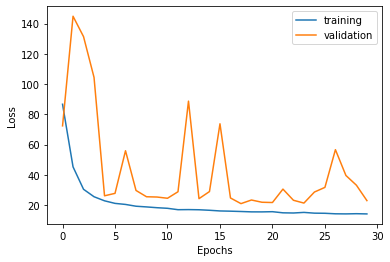

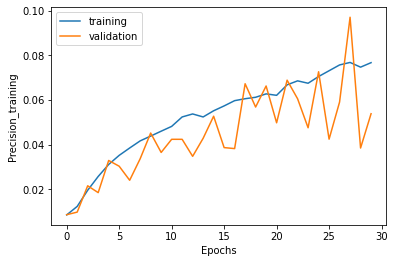

In [40]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training','validation'])

plt.figure()
plt.plot(history.history['loss_precision_training'])
plt.plot(history.history['val_loss_precision_training'])
plt.xlabel('Epochs')
plt.ylabel('Precision_training')
plt.legend(['training','validation'])

## **FINAL METRICS IN TESTING ONLY POSITIVES**

In [41]:
model_name=opcion+'/AAYOLO_domain_V26'
model = YOLO_domain()
filepath='{}.hdf5'.format(model_name)
model.load_weights(filepath)
Yhat_test = model.predict(X_test)

0.71


/shared/software/miniconda/envs/python-pytorch-tensorflow-3.7-1.11.0-2.6.0/lib/python3.7/site-packages/ipykernel_launcher.py:324: RuntimeWarning: invalid value encountered in double_scalars


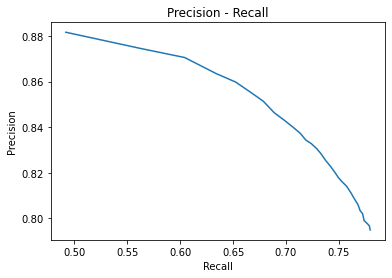

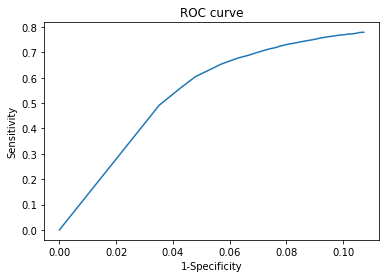

In [42]:
indexes=[3,5]
region='dom'
region='internal'
th_max=Precision_Recall_ROC_TE(Y_test,Yhat_test,indexes,region)
print(th_max)

In [43]:
threshold_NMS=0.1
print('Las siguientes metrica corresponden a un threshold de 0.5')
Yhat_pred = NMS(Yhat_test[:,:,:,0:9], 0.5, threshold_NMS,indexes)
metricas_TE(Y_test, Yhat_pred, indexes,region)

print('Las siguientes metrica corresponden a un threshold de 0.74')
Yhat_pred = NMS(Yhat_test[:,:,:,0:9], 0.74, threshold_NMS,indexes)
metricas_TE(Y_test, Yhat_pred, indexes,region)

print('Las siguientes metrica corresponden a un threshold de 0.95')
Yhat_pred = NMS(Yhat_test[:,:,:,0:9],0.95, threshold_NMS,indexes)
metricas_TE(Y_test, Yhat_pred, indexes,region)

Las siguientes metrica corresponden a un threshold de 0.5
TP: 21330931.0
TN: 41948959.0
FP: 6962550.0
FN: 4757560.0
Precision = 0.7539168121448188 
 Recall = 0.8176375935273528 
 Accuracy = 0.8437318666666667  
 F1 = 0.7844853805595722 
 A_PR = 0 
 A_ROC = 0
Las siguientes metrica corresponden a un threshold de 0.74
TP: 20148040.0
TN: 43937346.0
FP: 4974163.0
FN: 5940451.0
Precision = 0.8020013213013206 
 Recall = 0.7722961055892424 
 Accuracy = 0.8544718133333333  
 F1 = 0.7868684614975147 
 A_PR = 0 
 A_ROC = 0
Las siguientes metrica corresponden a un threshold de 0.95
TP: 17018357.0
TN: 46137459.0
FP: 2774050.0
FN: 9070134.0
Precision = 0.8598427164518191 
 Recall = 0.6523319804123588 
 Accuracy = 0.8420775466666667  
 F1 = 0.7418493421815763 
 A_PR = 0 
 A_ROC = 0


In [44]:
threshold_presence=th_max
threshold_NMS=0.1
Yhat_pred = NMS(Yhat_test, threshold_presence, threshold_NMS,indexes)
metricas_TE(Y_test, Yhat_pred, indexes,region)

TP: 20314393.0
TN: 43726855.0
FP: 5184654.0
FN: 5774098.0
Precision = 0.7966726364322557 
 Recall = 0.7786725955134776 
 Accuracy = 0.8538833066666667  
 F1 = 0.7875697809032871 
 A_PR = 0 
 A_ROC = 0


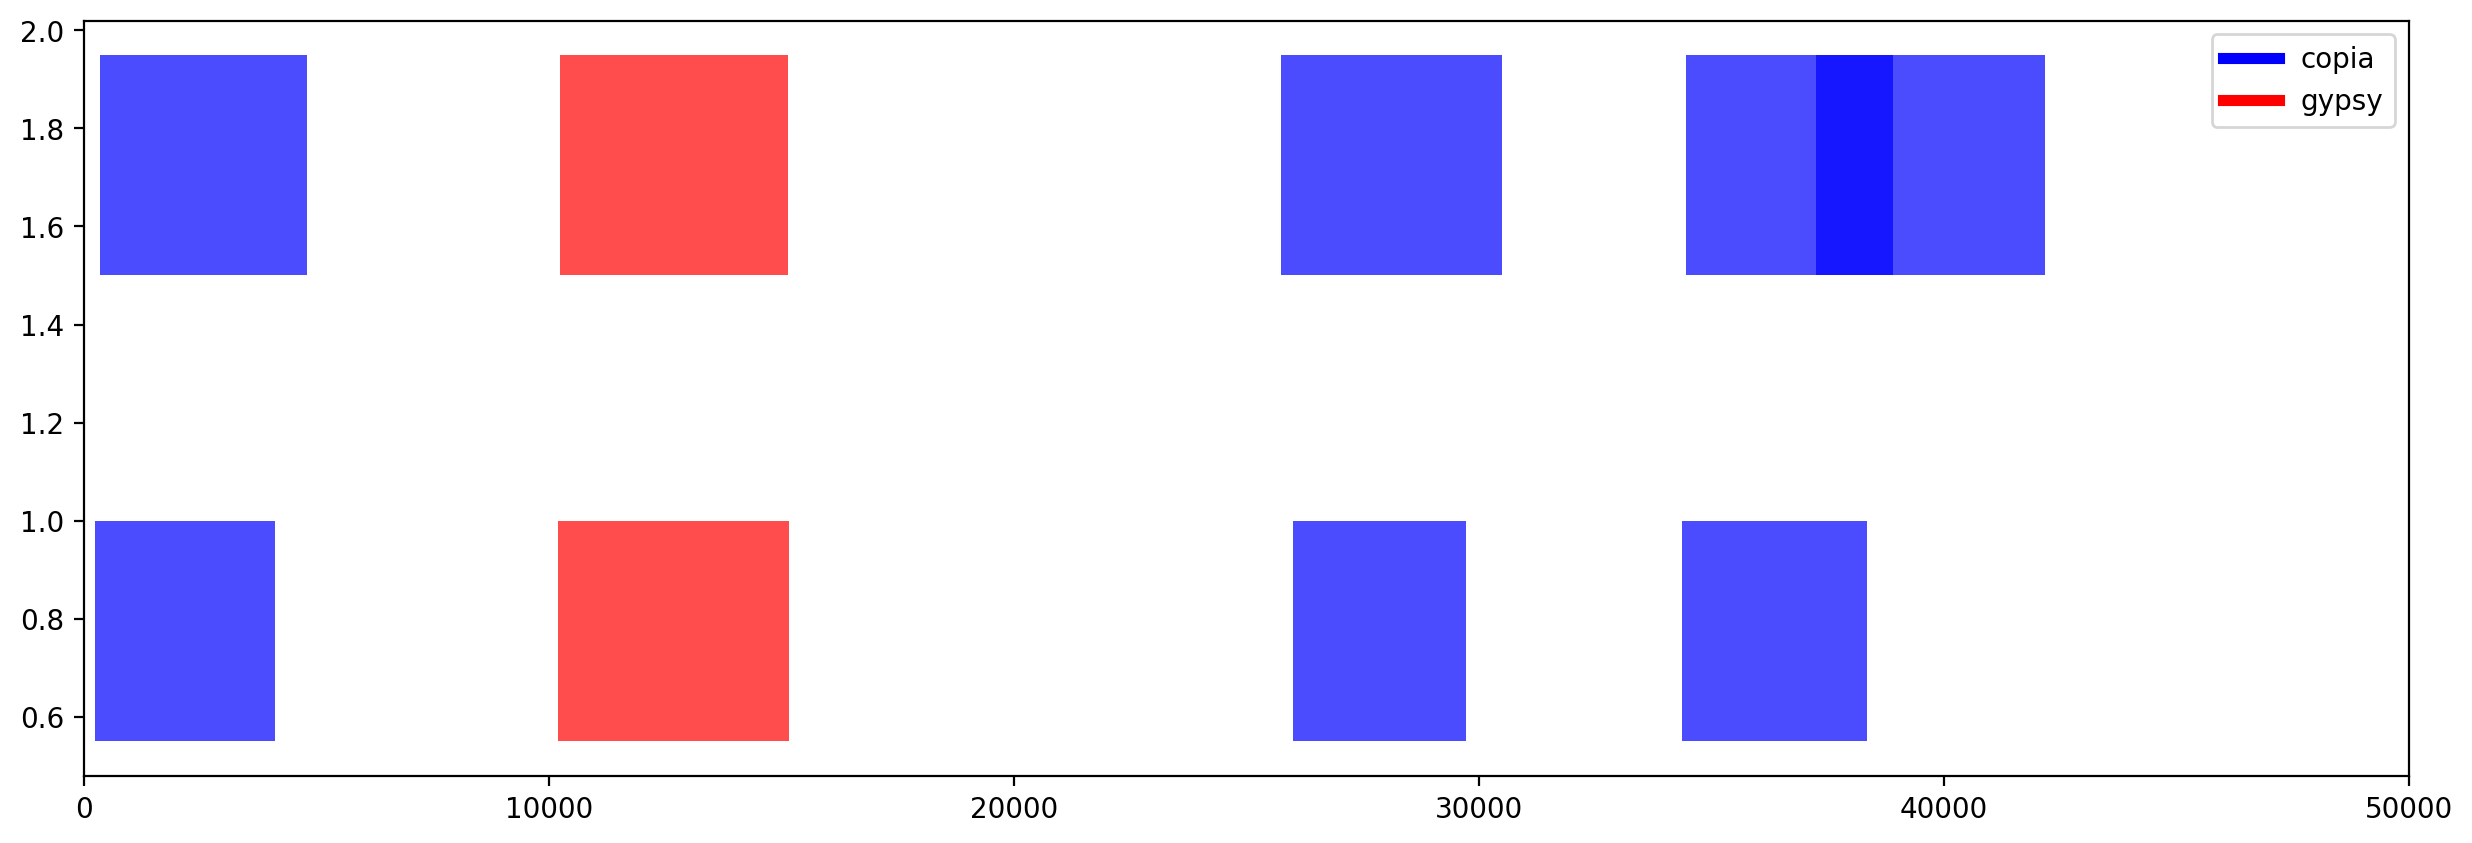

Hay 4.0dominios


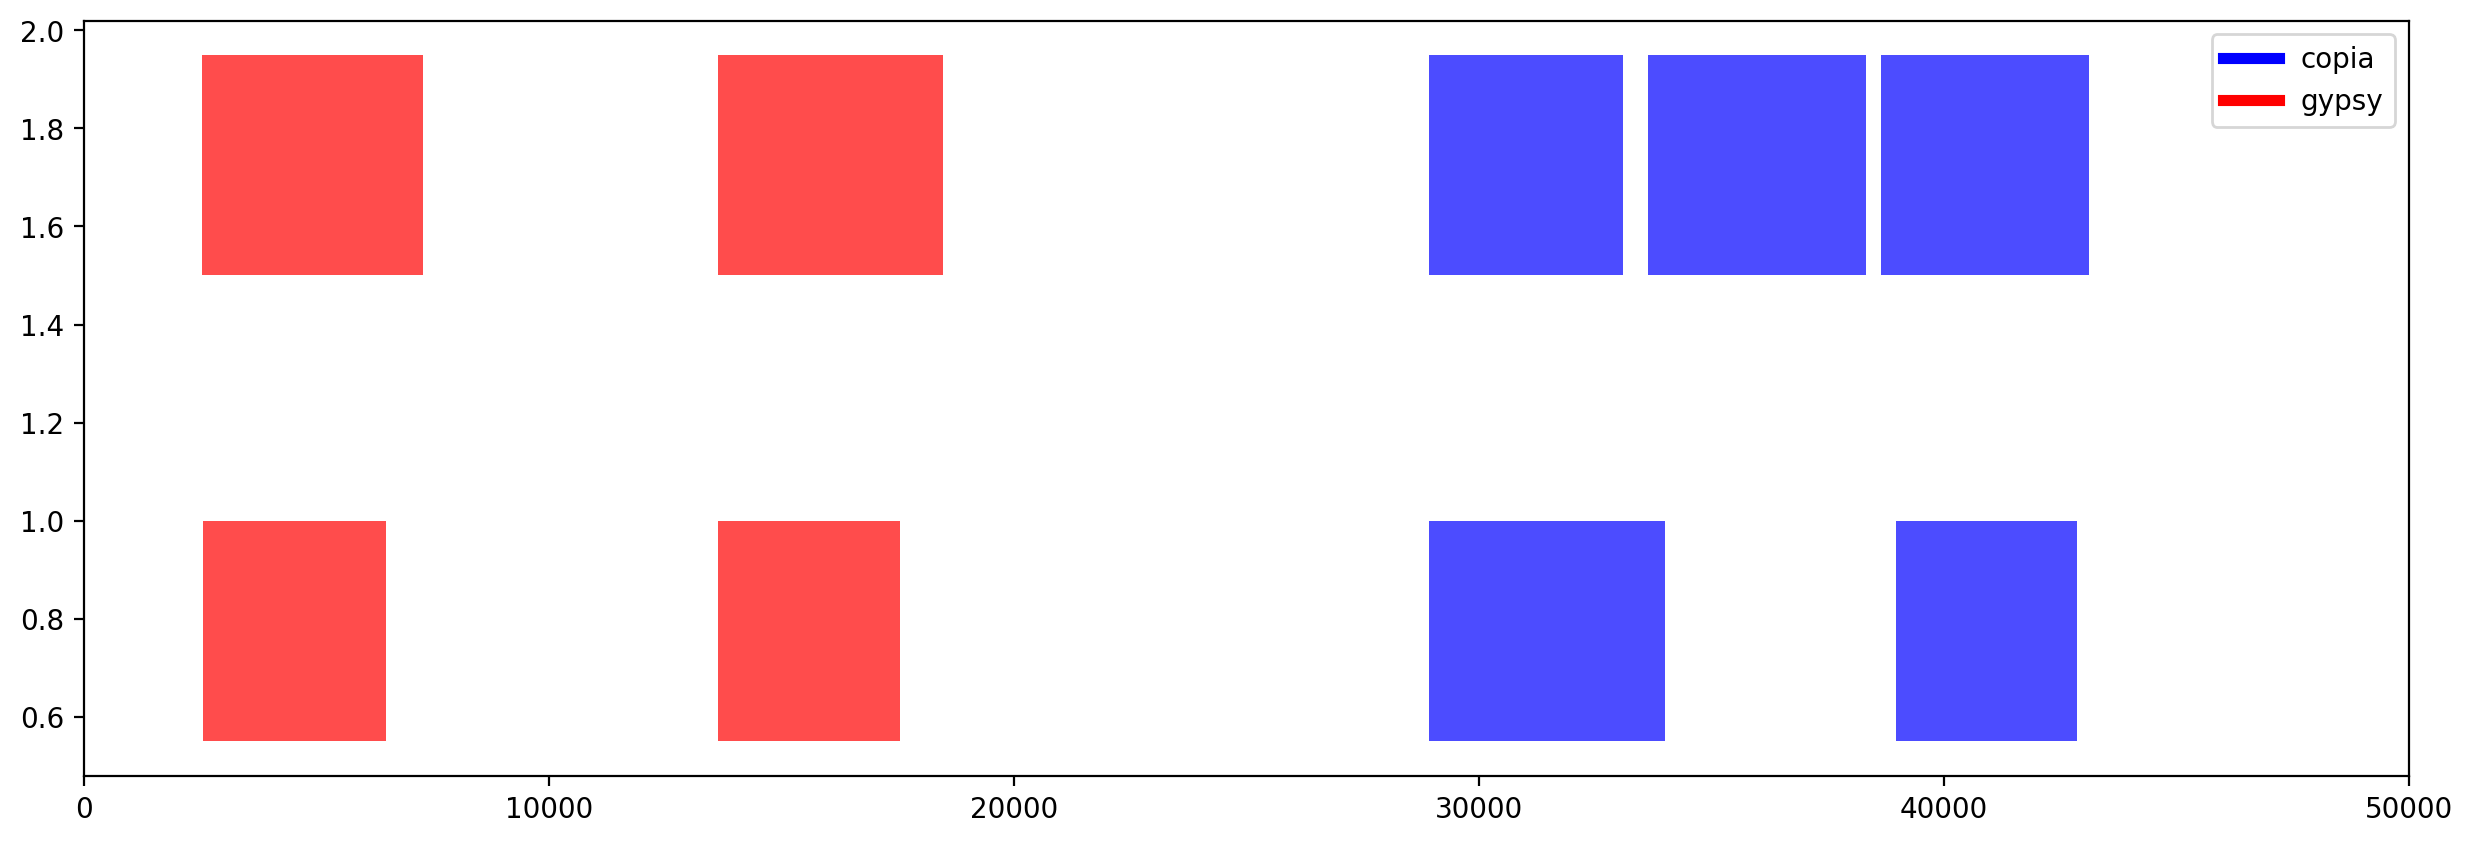

Hay 4.0dominios


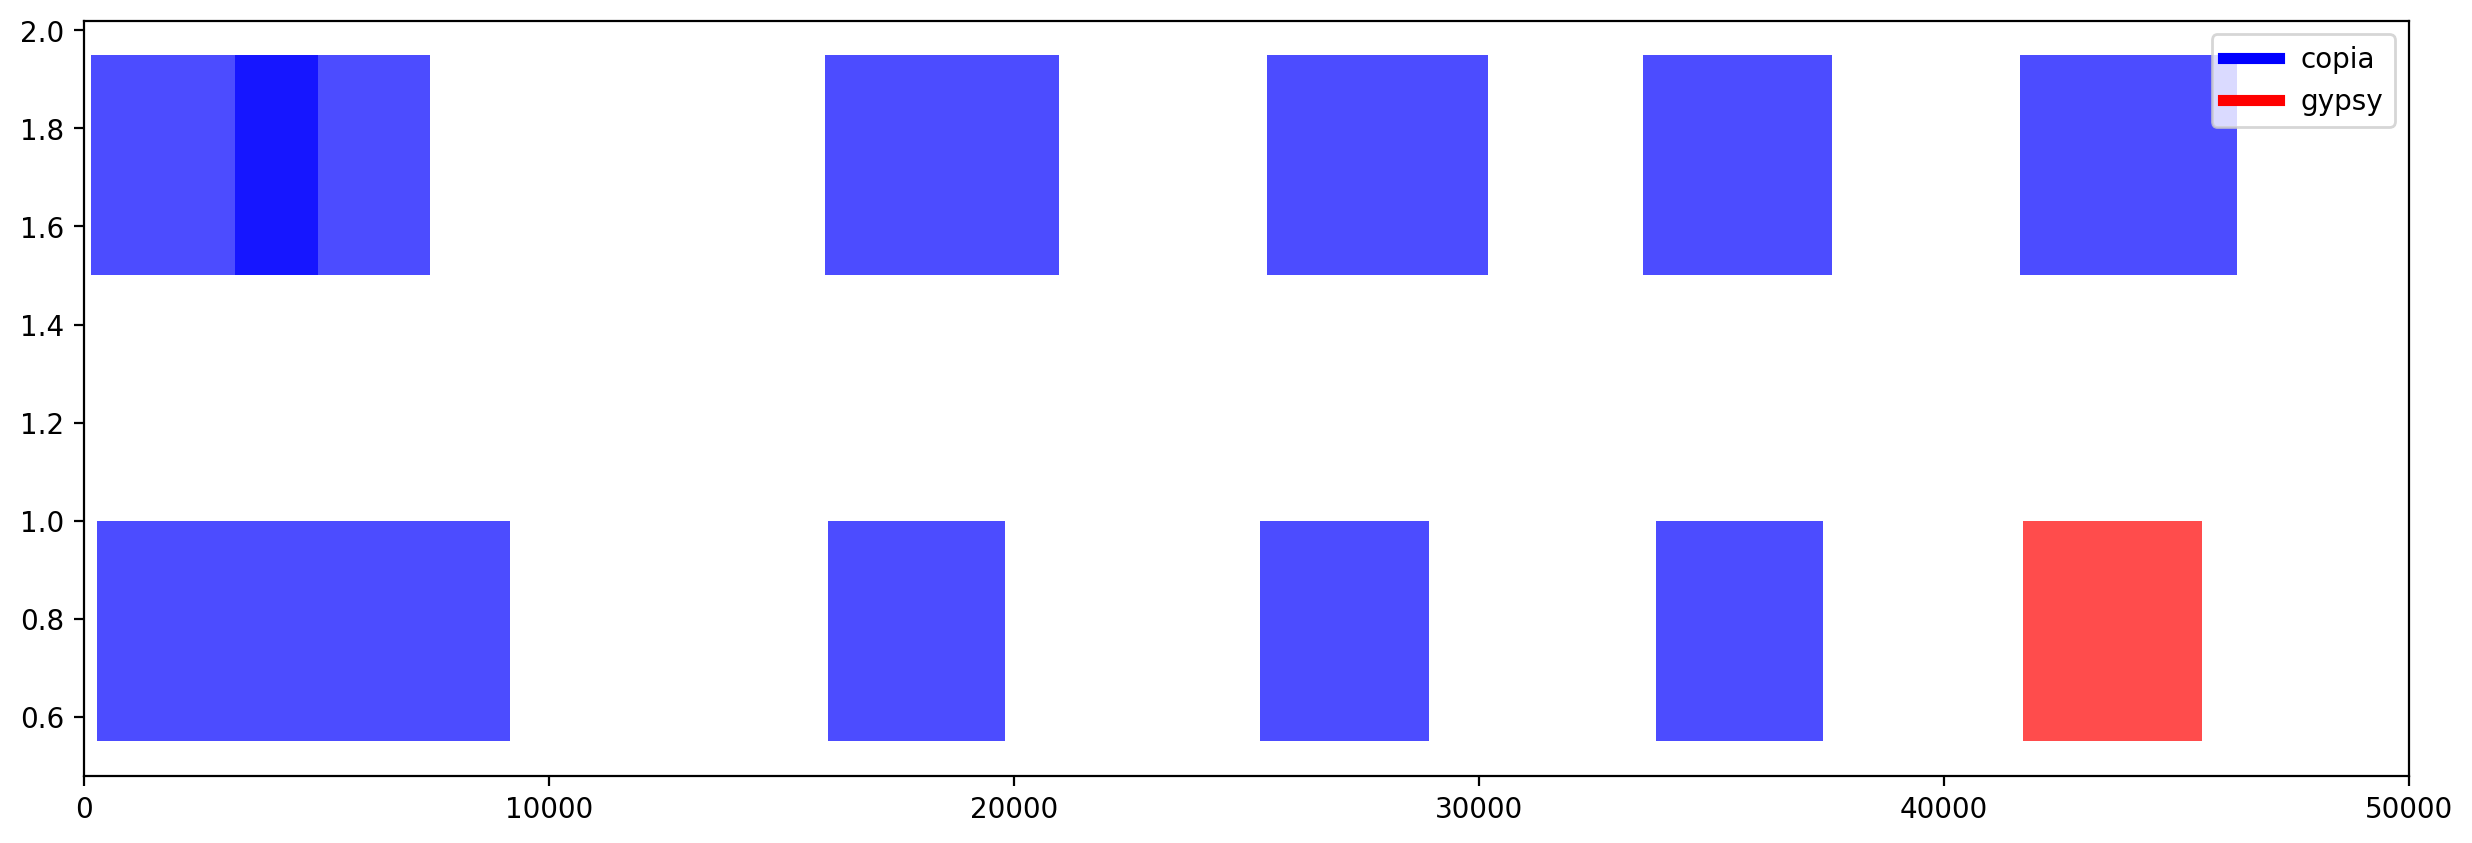

Hay 5.0dominios


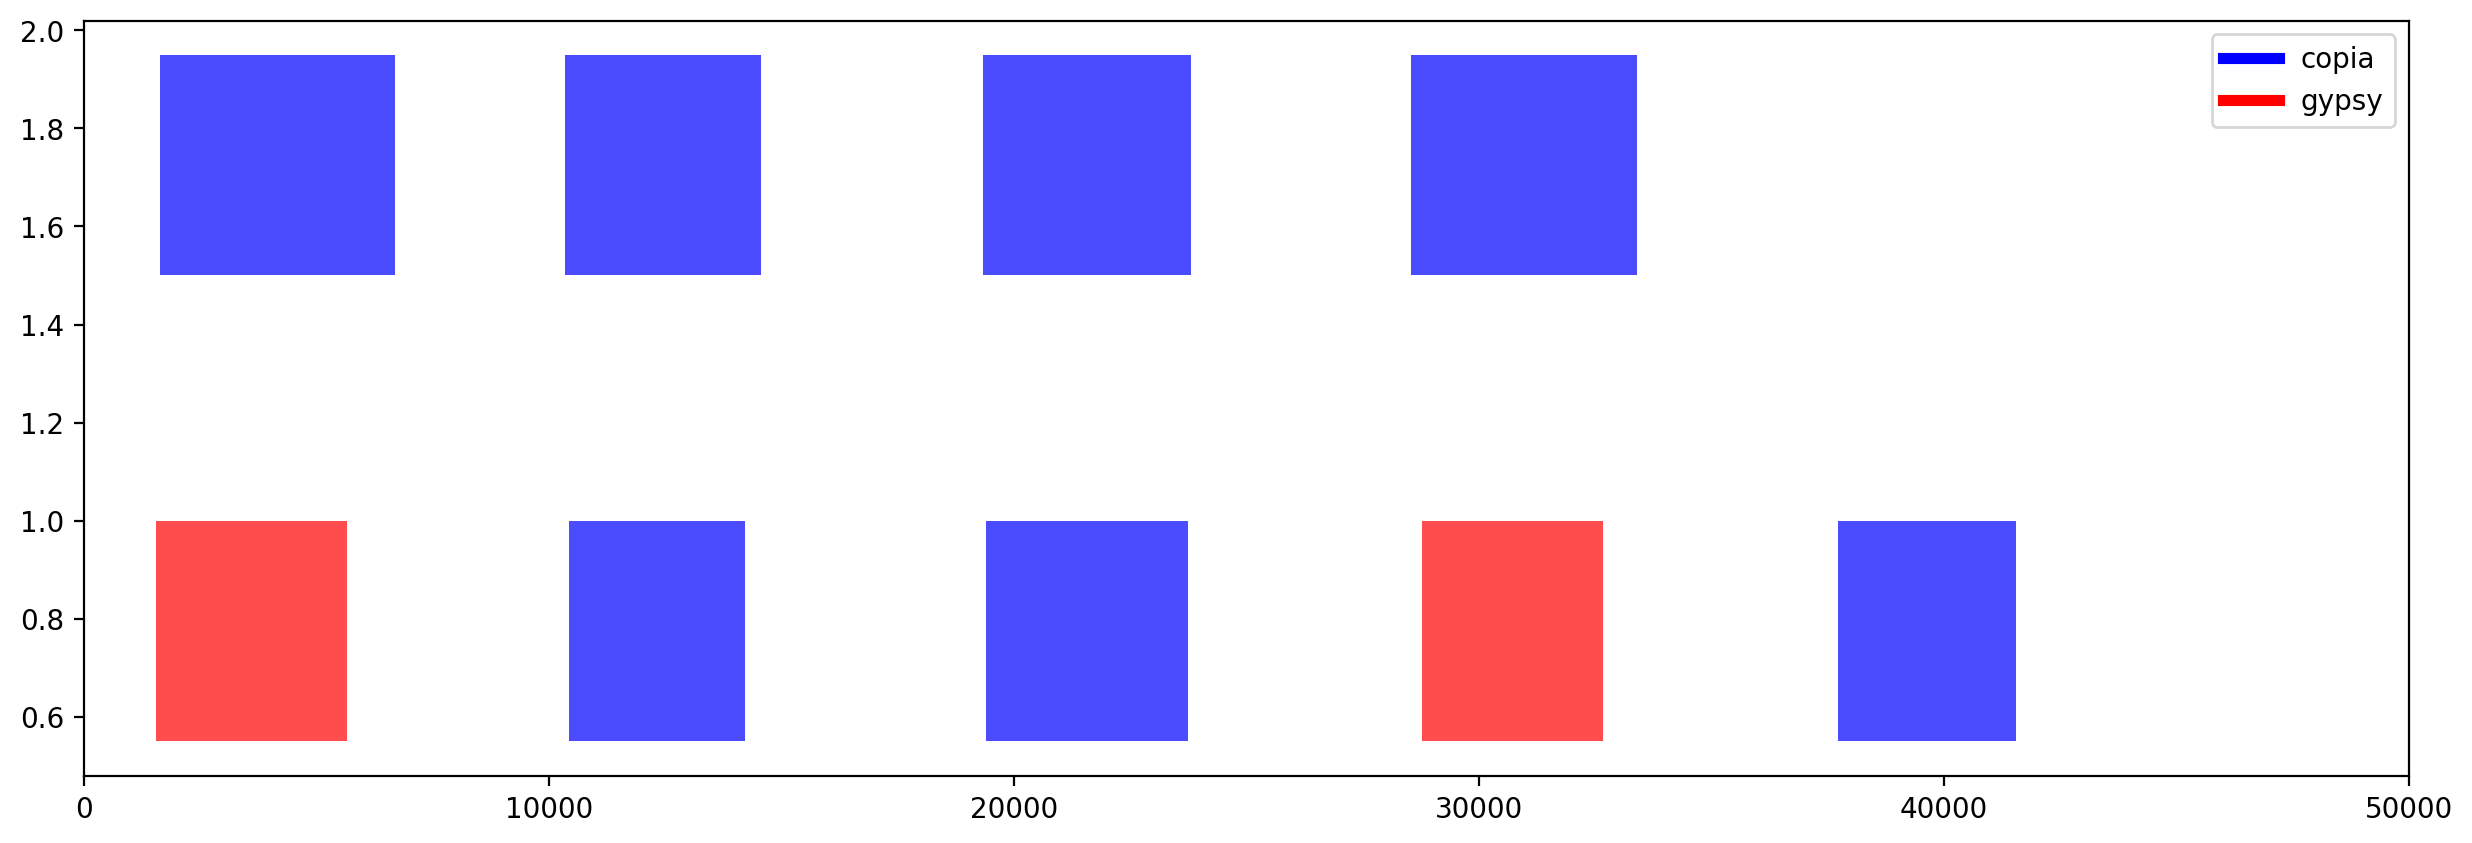

Hay 5.0dominios


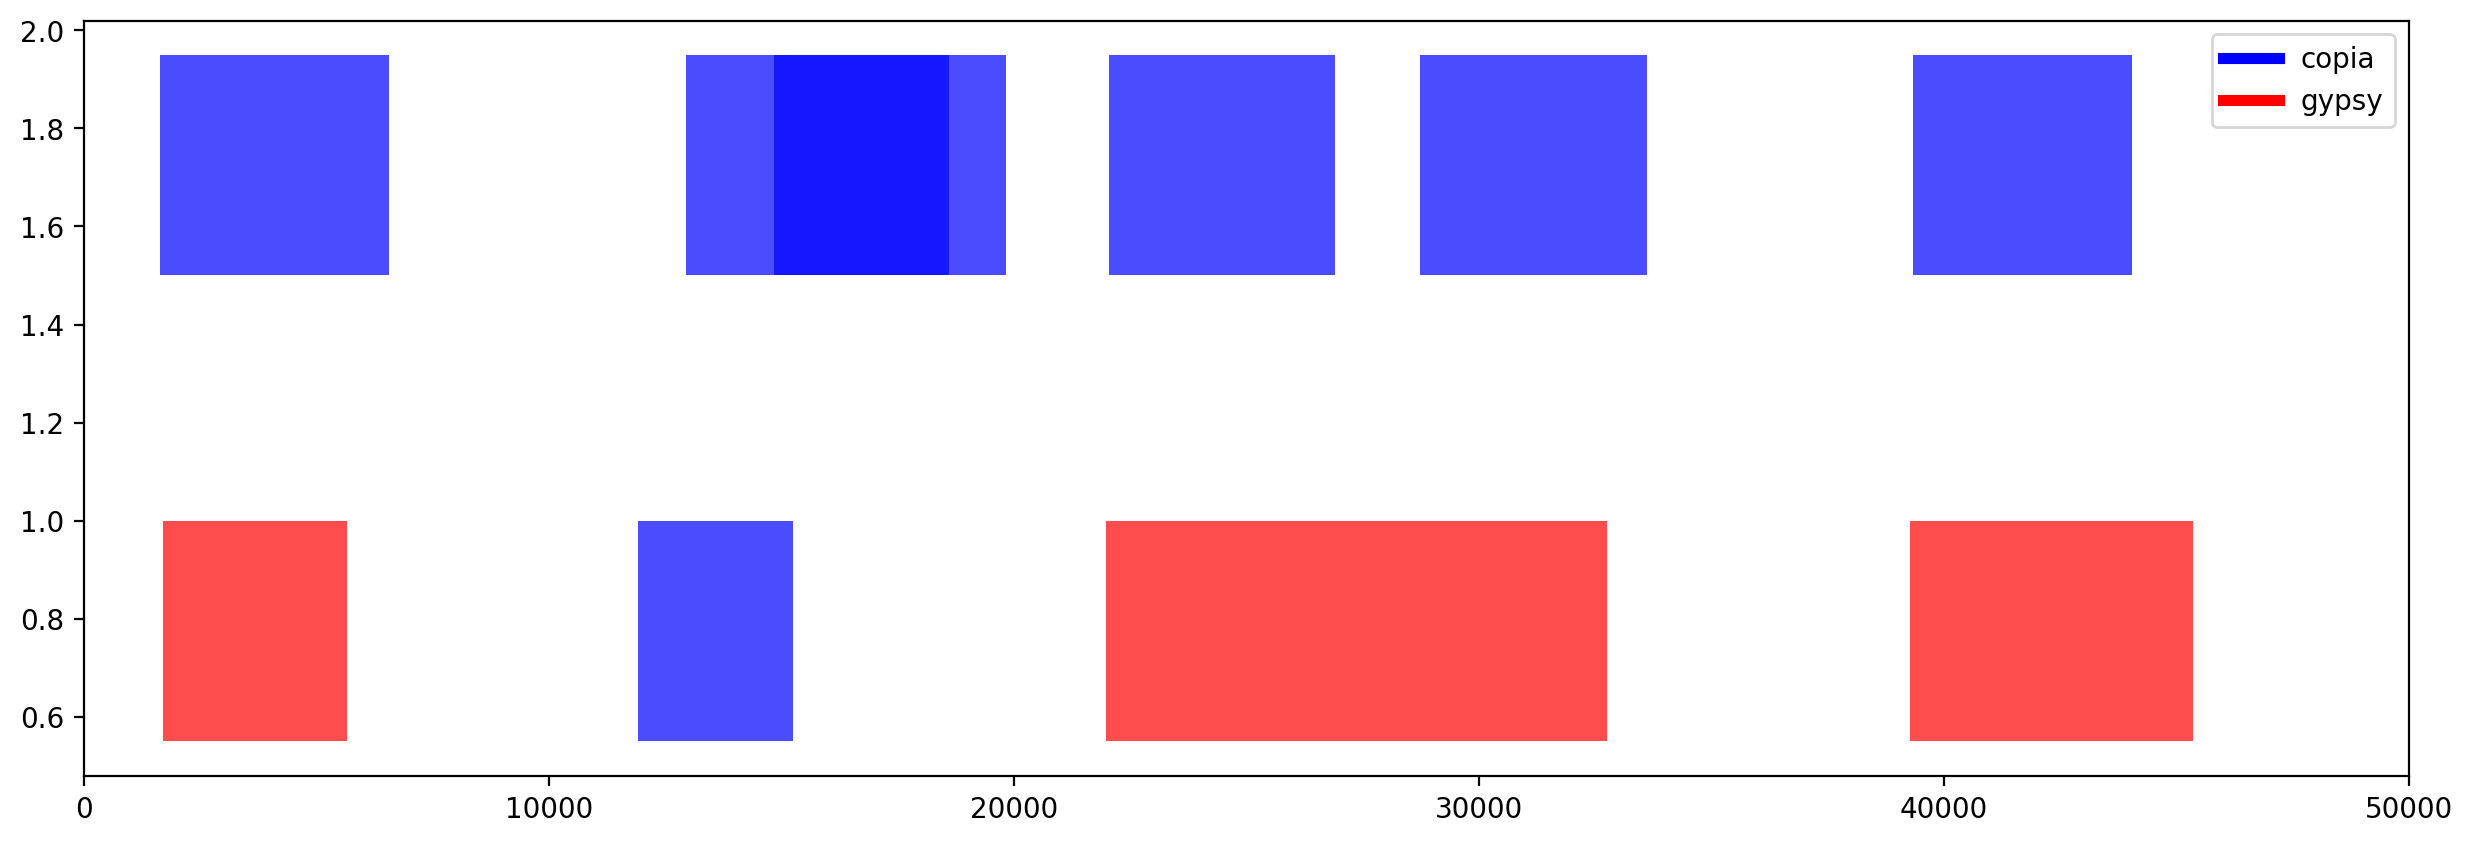

Hay 4.0dominios


In [45]:
for index in [398,399,400,401,402]:
  Visualization_LTR(Yhat_pred[index,:,:,:],Y_test[index,:,:,:], indexes,region)
  print('Hay '+str(np.sum(Y_test[index,:,:,0]))+'dominios')

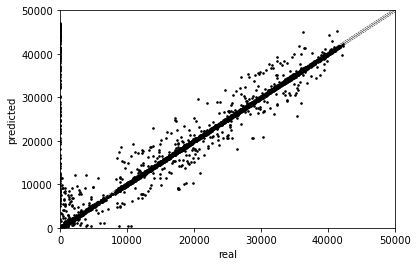

R^2 = 0.7823045863020306


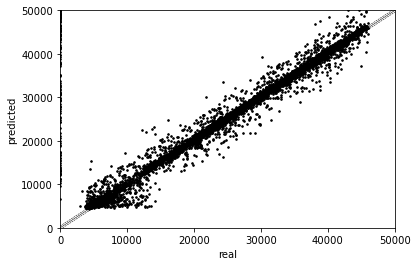

/shared/software/miniconda/envs/python-pytorch-tensorflow-3.7-1.11.0-2.6.0/lib/python3.7/site-packages/ipykernel_launcher.py:305: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


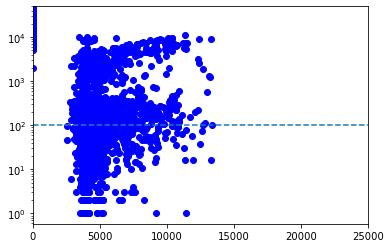

2-6-8-10-20-25-40-44-48-51-52-53-56-58-60-62-67-71-73-74-81-90-94-97-100-101-104-106-110-111-113-114-121-123-129-138-140-145-146-154-157-164-165-167-171-172-174-175-176-178-179-180-187-188-190-191-194-200-202-203-204-205-208-209-210-211-215-216-222-227-230-237-238-240-241-243-244-246-247-251-254-259-262-263-266-267-272-275-279-280-282-283-284-285-290-292-310-313-316-318-320-327-342-344-354-364-367-372-378-380-385-387-388-392-397-399-402-406-407-408-409-410-412-414-415-416-418-426-427-429-438-443-450-455-457-467-469-471-475-479-480-481-484-486-487-490-491-493-497-499-500-502-511-512-513-517-518-521-524-528-531-534-540-541-545-555-556-557-563-566-572-576-577-580-584-586-590-605-612-613-619-622-625-626-627-630-637-644-645-647-651-652-654-658-659-661-662-664-665-671-673-674-675-684-685-686-690-692-704-711-712-719-730-732-737-738-740-741-742-743-744-745-751-752-753-754-758-763-766-770-772-774-777-782-784-787-789-791-794-799-800-805-811-815-820-821-823-827-829-834-835-837-839-841-842-843-844

In [46]:
malos=Plot_parity_TE(Y_test,Yhat_pred, indexes,region)
print(malos)